<a href="https://colab.research.google.com/github/paulina-radomska/colab-notebooks/blob/main/Streaming_Music_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unlocking Insights from Streaming Music Data: Trends, Patterns, and Predictions

#### Author: Paulina Radomska



---



This analysis explores real-world streaming music data, focusing on data transformation, aggregation, and visualization to uncover meaningful insights. It involves cleaning and structuring raw data, applying transformations to enhance usability, and aggregating key metrics such as song popularity and streaming trends over time. Through data visualization techniques, trends in release dates, top artists and stream counts rankings are identified and presented in an engaging and interpretable format.


In addition to these exploratory analyses, the project includes the creation of machine learning models for both regression and classification tasks, aiming to predict the streamability and popularity of songs. Regression models are built to forecast stream counts, while classification models are used to predict the popularity of songs based on various features such as genre, release year, and artist.


This project not only highlights technical skills in data manipulation and analysis but also demonstrates the ability to extract valuable insights from complex datasets.

## 1. Preparing the environment



---
Importing required libraries and the data set.

* Pandas - data manipulation
* Numpy - numerical operations
* Matplotlib, Seaborn - data visualisation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The analyzed dataset contains 953 rows and 24 columns and was sourced from Kaggle.



**1. Song's metadata**

* track_name
* artist(s)_name
* artist_count
* released_year
* released_month
* released_day


**2. Popularity metrics**

* in_spotify_playlists
* in_spotify_charts
* streams
* in_apple_playlists
* in_apple_charts
* in_deezer_playlists
* in_deezer_charts
* in_shazam_charts

**3. Song's technical features**

* bpm
* key
* mode
* danceability_%
* valence_%
* energy_%
* acousticness_%
* instrumentalness_%
* liveness_%
* speechiness_%


In [ ]:
data = pd.read_csv("spotify_2023.csv", encoding="ISO-8859-1")

Setting style for visualization

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("rocket")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

## 2. Data exploration


---

The initial examination of the dataset begins with previewing the first 5 rows using the `df.head()` function, transposing the output for better visualization.

In [ ]:
data.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703,133716286,140003974,800840817,303236322
in_apple_playlists,43,48,94,116,84


Using the `df.info()` function to gain a deeper understanding of the dataset. This provides essential details such as the number of entries, column names, data types, and missing values, helping to assess data quality and structure.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

Checking the exact value of missing entries.

In [ ]:
null1 = sum(pd.isnull(data['key']))
null2 = sum(pd.isnull(data['in_shazam_charts']))

print (null1, null2)

95 50


Checking for unique values in categorical columns helps identify data inconsistencies.

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")


Unique values in categorical columns:
track_name: 943 unique values
artist(s)_name: 645 unique values
streams: 949 unique values
in_deezer_playlists: 348 unique values
in_shazam_charts: 198 unique values
key: 11 unique values
mode: 2 unique values


Further analyzing the dataset by using the `df.describe()` function, which provides summary statistics for numerical columns, including measures like mean, standard deviation, minimum, maximum, and percentiles, helping to understand the distribution of the data and identifying potential outliers.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


Checking wether rthe dataset contains duplicates.

In [ ]:
data.duplicated().sum()

0

####Initial data exploration and assumptions:
- The dataset consists of 953 records, and a mixof categorical and numerical variables.
- Each row represents one song.
- The *key* and *in_shazam_charts* variables have missing values, with 95 and 50 missing entries, respectively.
- The columns *released_year*, *released_month*, and *released_day* can be combined into a single datetime column called *release_date* by converting them into a unified datetime format.
- The columns *streams*, *in_deezer_playlists*, and *in_shazam_charts* have incorrect data types and should be converted to numerical values for proper analysis.

## 3. Data cleaning

---

Before starting the analysis, we need to clean the data its accuracy, consistency, and reliability.









In [ ]:
clean_data = data.copy()

Creating a new column *release_date* by combining release day, month and year columns.

In [ ]:
clean_data['release_date'] = pd.to_datetime(clean_data.rename(columns={
    'released_year': 'year',
    'released_month': 'month',
    'released_day': 'day'
})[['year', 'month', 'day']])

clean_data['release_date'].head()

,release_date
0,2023-07-14
1,2023-03-23
2,2023-06-30
3,2019-08-23
4,2023-05-18


Calculating additional date values for more advanced analysis.

In [ ]:
clean_data['decade'] = (clean_data['released_year'] // 10) * 10
clean_data['release_day_name'] = clean_data['release_date'].dt.day_name()
clean_data['release_quarter'] = clean_data['release_date'].dt.quarter
clean_data['weekend_release'] = clean_data['release_day_name'].apply(lambda x : 'Yes' if x in ['Saturday','Sunday'] else 'No')

print('Songs released per decade:\n', clean_data['decade'].value_counts())
print('\n', 'Songs released per day of the week:\n', clean_data['release_day_name'].value_counts())
print('\n', 'Songs released per quarter:\n', clean_data['release_quarter'].value_counts())
print('\n', 'Songs released during weekend:\n', clean_data['weekend_release'].value_counts())

Songs released per decade:
 decade
2020    733
2010    151
2000     20
1990     14
1980     12
1950      9
1970      7
1960      4
1940      2
1930      1
Name: count, dtype: int64

 Songs released per day of the week:
 release_day_name
Friday       526
Thursday     155
Wednesday     87
Tuesday       65
Monday        60
Sunday        37
Saturday      23
Name: count, dtype: int64

 Songs released per quarter:
 release_quarter
1    281
2    280
4    228
3    164
Name: count, dtype: int64

 Songs released during weekend:
 weekend_release
No     893
Yes     60
Name: count, dtype: int64


Removing commas from the text values in case the numbers are written with commas as thousand separators, e.g., "1,000" instead of "1000" and ensuring that the values *streams*, *in_deezer_playlists*, and *in_shazam_charts* are of numeric type (float), enabling further analysis.

In [ ]:
clean_data['in_deezer_playlists'] = clean_data['in_deezer_playlists'].str.replace(',', '').astype(float)

In [ ]:
clean_data['in_shazam_charts'] = clean_data['in_shazam_charts'].fillna('0')
clean_data['in_shazam_charts'] = clean_data['in_shazam_charts'].str.replace(',', '').astype(float)

In [ ]:
clean_data = clean_data[clean_data['streams'].str.replace(',', '').str.isdigit()]
clean_data['streams'] = clean_data['streams'].str.replace(',', '').astype(float)

Replacing missing value assuming that:
* no value in column *key* means no recognizable music key,
* no value in column *in_deezer_playlists* means no appearance in a chart.

In [ ]:
clean_data['key'] = clean_data['key'].fillna('Unknown')

Previewing the first 5 rows of the cleaned dataset.


In [ ]:
clean_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny,"Dave, Central Cee","Eslabon Armado, Peso Pluma",Quevedo,Gunna,"Peso Pluma, Yng Lvcas"
artist_count,2,1,1,1,1,2,2,1,1,2
released_year,2023,2023,2023,2019,2023,2023,2023,2023,2023,2023
released_month,7,3,6,8,5,6,3,7,5,3
released_day,14,23,30,23,18,1,16,7,15,17
in_spotify_playlists,553,1474,1397,7858,3133,2186,3090,714,1096,2953
in_spotify_charts,147,48,113,100,50,91,50,43,83,44
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0,183706234.0,725980112.0,58149378.0,95217315.0,553634067.0
in_apple_playlists,43,48,94,116,84,67,34,25,60,49


In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            952 non-null    object        
 1   artist(s)_name        952 non-null    object        
 2   artist_count          952 non-null    int64         
 3   released_year         952 non-null    int64         
 4   released_month        952 non-null    int64         
 5   released_day          952 non-null    int64         
 6   in_spotify_playlists  952 non-null    int64         
 7   in_spotify_charts     952 non-null    int64         
 8   streams               952 non-null    float64       
 9   in_apple_playlists    952 non-null    int64         
 10  in_apple_charts       952 non-null    int64         
 11  in_deezer_playlists   952 non-null    float64       
 12  in_deezer_charts      952 non-null    int64         
 13  in_shazam_charts      952

## 4. Data preprocessing

---

Another step before analysis is data preprocessing, which involves transforming and organizing raw data into a format that is suitable for analysis, ensuring that the data is clean, consistent, and ready for modeling or further exploration.

To enhance data interpretability, we need to group similar data into meaningful categories. In this case, we will categorize the energy level, valence, and danceability. To determine the limits for each of the category, we will use the descriptive statistics generated by the `df.describe()` function.

In [ ]:
def set_energy(energy):
    if energy < 53:
        return "Low"
    elif energy < 77:
        return "Medium"
    else:
        return "High"

clean_data['energy_category'] = clean_data['energy_%'].apply(set_energy)

In [ ]:
def set_valence(valence):
    if valence < 32:
        return "Low"
    elif valence < 70:
        return "Medium"
    else:
        return "High"

clean_data['valence_category'] = clean_data['valence_%'].apply(set_valence)

In [ ]:
def set_danceability(dance):
    if dance < 57:
        return "Low"
    elif dance < 78:
        return "Medium"
    else:
        return "High"

clean_data['danceability_category'] = clean_data['danceability_%'].apply(set_danceability)

Additionaly, to ensure that all features are on a similar scale, making it easier to compare patterns and relationships, we will normalize streams value on a scale from 0-100.

In [ ]:
max_streams = clean_data['streams'].max()
min_streams = clean_data['streams'].min()

clean_data['streams_normalized'] = (clean_data['streams'] - min_streams) / (max_streams - min_streams) * 100

In [ ]:
clean_data['streams_normalized'].describe()

,streams_normalized
count,952.000000
mean,13.880929
std,15.304358
min,0.000000
25%,3.823907
50%,7.843861
75%,18.193463
max,100.000000


In [ ]:
def set_popularity(score):
    if score < 10:
        return "Low"
    elif score < 40:
        return "Medium"
    else:
        return "High"

clean_data['popularity'] = clean_data['streams_normalized'].apply(set_popularity)

Sample of cleaned dataset.

In [ ]:
clean_data.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147,48,113,100,50
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


## 5. Exploratory Data Analysis

---



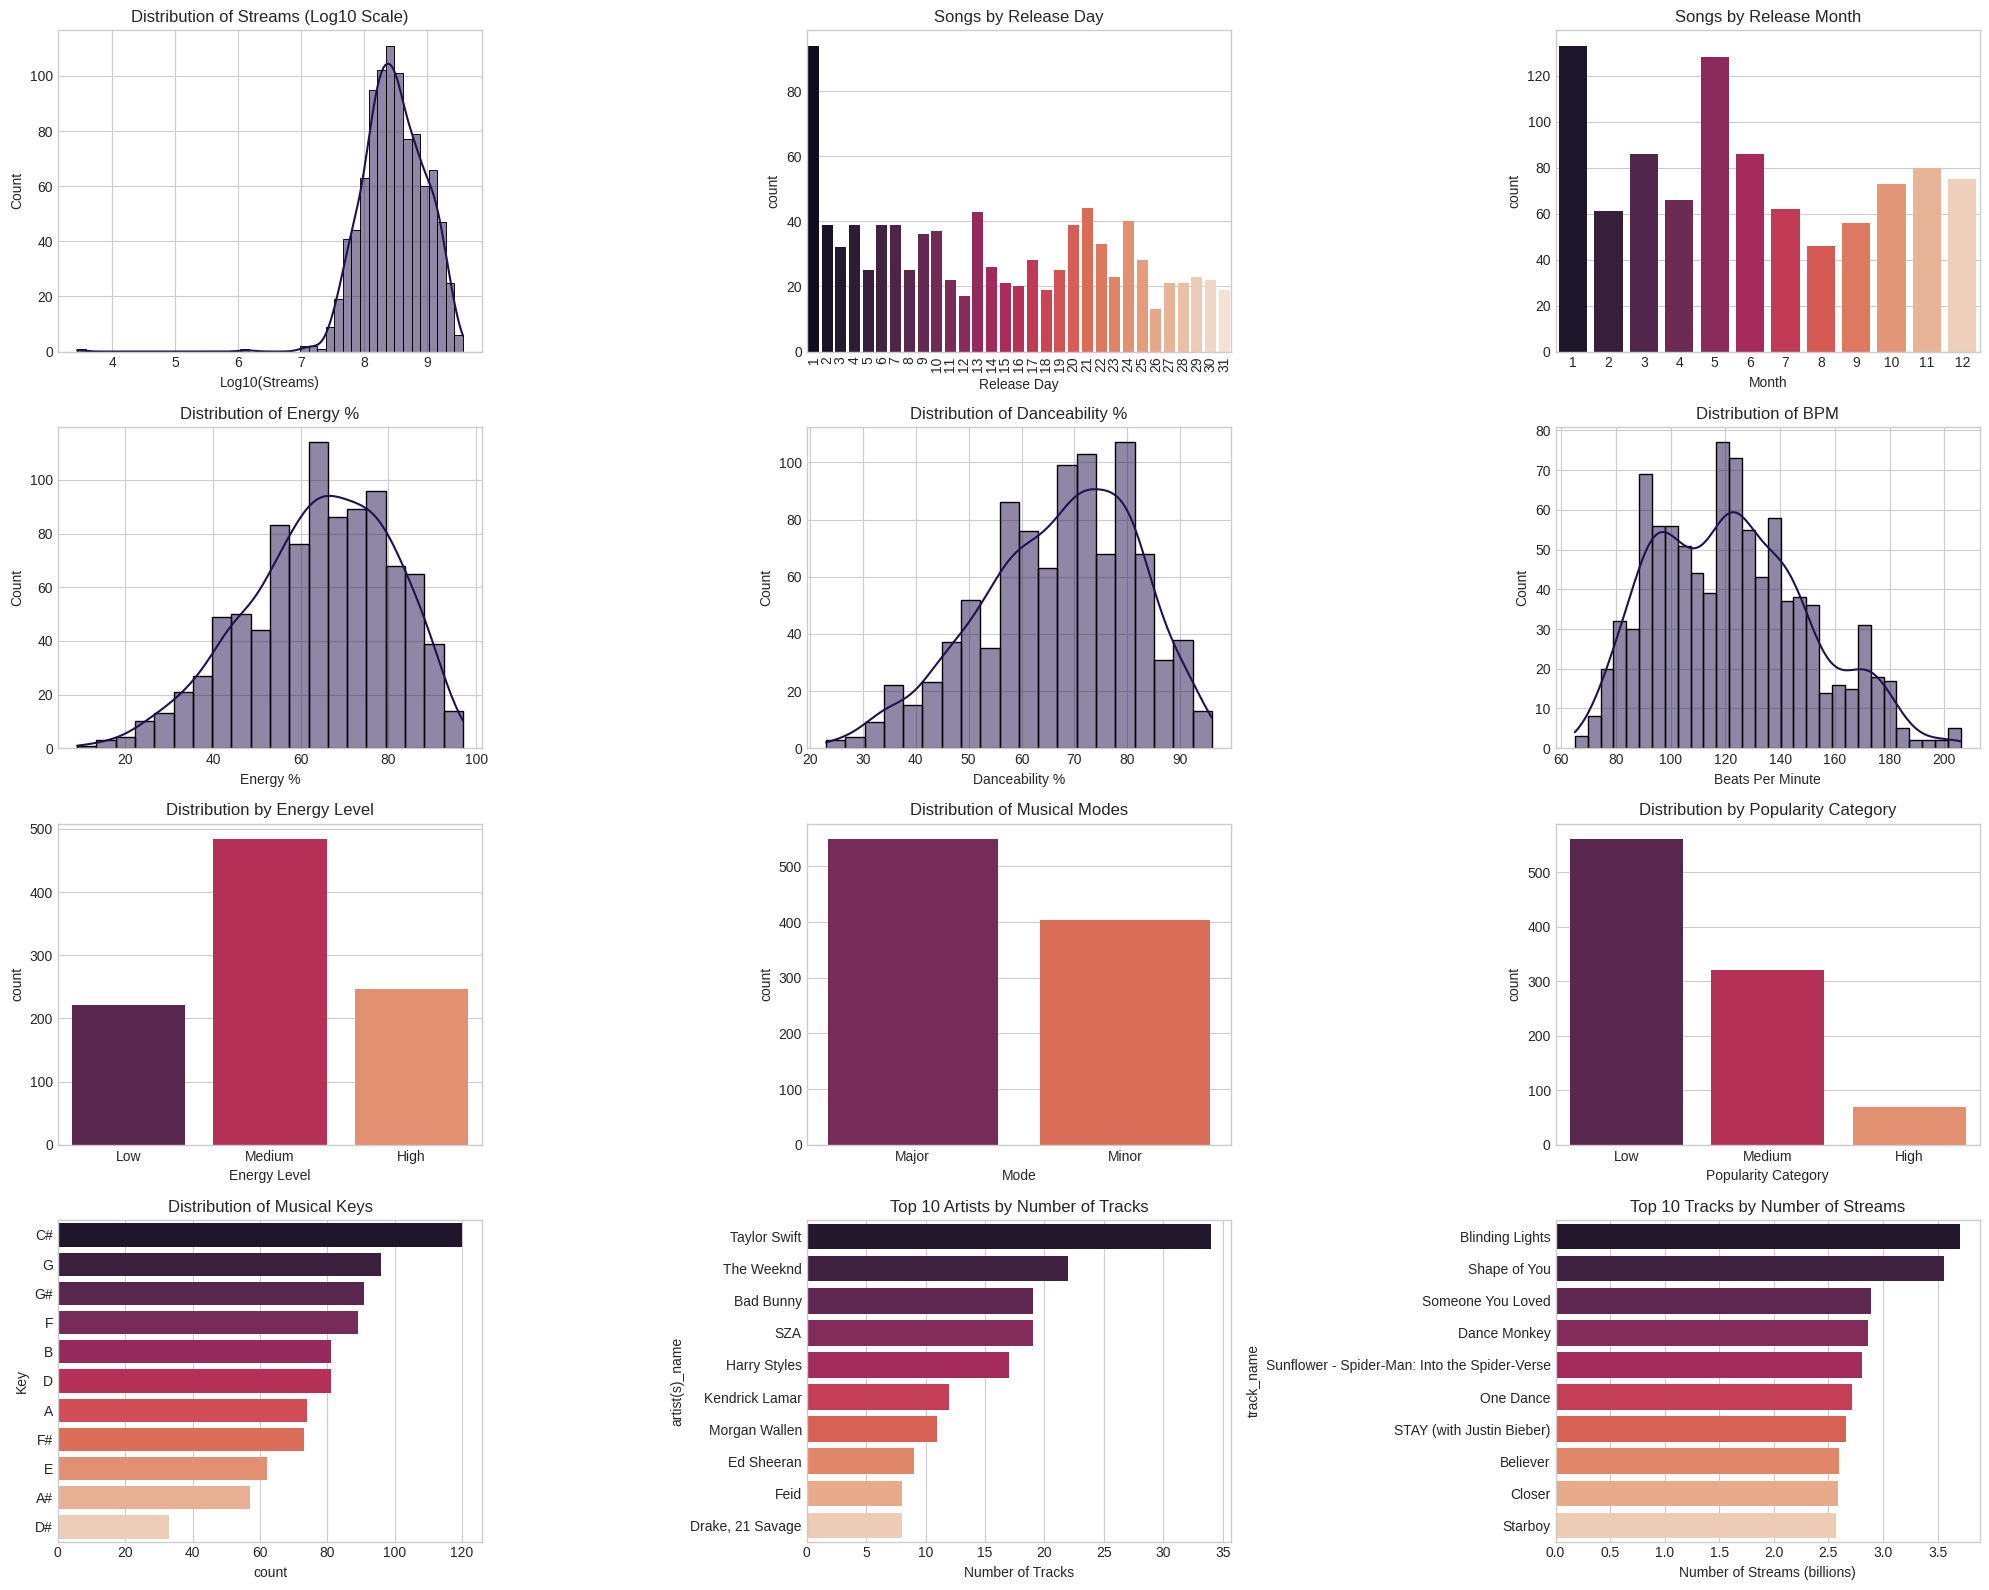

In [ ]:
# Setting up the figure size
plt.figure(figsize=(20, 16))

# 1. Distribution of streams (log-transformed for better visualization)
plt.subplot(4, 3, 1)
sns.histplot(np.log10(clean_data['streams']), kde=True)
plt.title('Distribution of Streams (Log10 Scale)')
plt.xlabel('Log10(Streams)')

# 2. Distribution of release days
plt.subplot(4, 3, 2)
sns.countplot(data=clean_data, x='released_day', order=sorted(clean_data['released_day'].unique()), palette="rocket")
plt.title('Songs by Release Day')
plt.xticks(rotation=90)
plt.xlabel('Release Day')


#3. Distribution of release months
plt.subplot(4, 3, 3)
sns.countplot(data=clean_data, x='released_month', order=range(1, 13), palette="rocket")
plt.title('Songs by Release Month')
plt.xlabel('Month')


# 4. Distribution of energy percentages
plt.subplot(4, 3, 4)
sns.histplot(clean_data['energy_%'], kde=True, bins=20)
plt.title('Distribution of Energy %')
plt.xlabel('Energy %')

# 5. Distribution of danceability percentages
plt.subplot(4, 3, 5)
sns.histplot(clean_data['danceability_%'], kde=True, bins=20)
plt.title('Distribution of Danceability %')
plt.xlabel('Danceability %')

# 6. Distribution of BPM (tempo)
plt.subplot(4, 3, 6)
sns.histplot(clean_data['bpm'], kde=True, bins=30)
plt.title('Distribution of BPM')
plt.xlabel('Beats Per Minute')

# 7. Distribution of Energy Level
plt.subplot(4, 3, 7)
sns.countplot(data=clean_data, x='energy_category', order=['Low', 'Medium', 'High'], palette="rocket")
plt.title('Distribution by Energy Level')
plt.xlabel('Energy Level')

# 8. Distribution of Modes (Major/Minor)
plt.subplot(4, 3, 8)
sns.countplot(data=clean_data, x='mode', palette="rocket")
plt.title('Distribution of Musical Modes')
plt.xlabel('Mode')

# 9. Distribution by Popularity Category
plt.subplot(4, 3, 9)
sns.countplot(data=clean_data, x='popularity', order=['Low', 'Medium', 'High'], palette="rocket")
plt.title('Distribution by Popularity Category')
plt.xlabel('Popularity Category')

#10. Distribution of Musical Keys
plt.subplot(4, 3, 10)
key_order = [k for k in clean_data['key'].value_counts().index.tolist() if k != 'Unknown']
sns.countplot(data=clean_data[clean_data['key'] != 'Unknown'], y='key', order=key_order, palette="rocket")
plt.title('Distribution of Musical Keys')
plt.ylabel('Key')

# 11. Top 10 Artists by Number of Tracks
plt.subplot(4, 3, 11)
top_artists = clean_data['artist(s)_name'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index, palette="rocket")
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')

# 12. Top 10 Tracks by Number of Streams
plt.subplot(4, 3, 12)
top_tracks = clean_data.sort_values('streams', ascending=False).head(10)
top_tracks['streams'] = top_tracks['streams']/1e9
sns.barplot(x="streams", y="track_name", data=top_tracks, palette="rocket")
plt.title('Top 10 Tracks by Number of Streams')
plt.xlabel('Number of Streams (billions)')

plt.tight_layout()
plt.show()

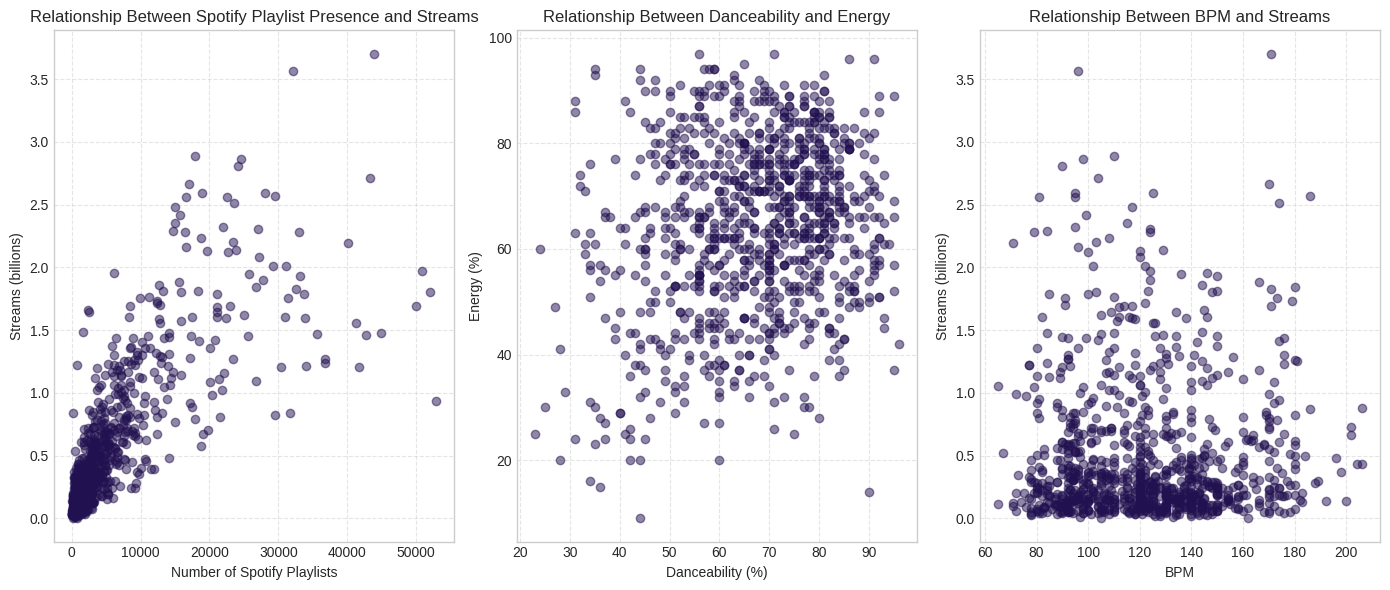

In [ ]:
# Setting up the figure size
plt.figure(figsize=(14,6))

# 1. The relationship between streams and playlist presence
plt.subplot(1, 3, 1)
plt.scatter(clean_data['in_spotify_playlists'], clean_data['streams'] / 1e9, alpha=0.5, cmap = "rocket")
plt.title('Relationship Between Spotify Playlist Presence and Streams')
plt.xlabel('Number of Spotify Playlists')
plt.ylabel('Streams (billions)')
plt.grid(True, linestyle='--', alpha=0.5)

# 2. The relationship between danceability and energy
plt.subplot(1, 3, 2)
plt.scatter(clean_data['danceability_%'], clean_data['energy_%'], alpha=0.5, cmap = "rocket")
plt.title('Relationship Between Danceability and Energy')
plt.xlabel('Danceability (%)')
plt.ylabel('Energy (%)')
plt.grid(True, linestyle='--', alpha=0.5)

# 3. The relationship between bpm and streams
plt.subplot(1, 3, 3)
plt.scatter(clean_data['bpm'], clean_data['streams'] / 1e9, alpha=0.5, cmap = "rocket")
plt.title('Relationship Between BPM and Streams')
plt.xlabel('BPM')
plt.ylabel('Streams (billions)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

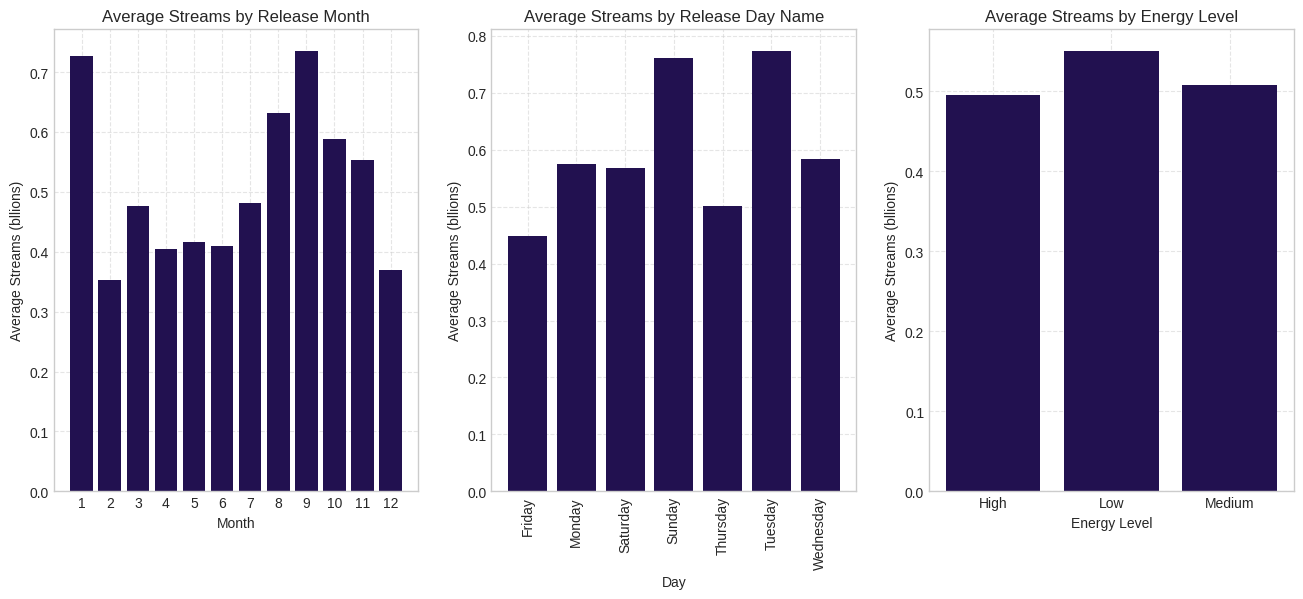

In [ ]:
# Setting up the figure size
plt.figure(figsize=(16,6))

# 1. The average streams number per release month
plt.subplot(1, 3, 1)
monthly_streams = clean_data.groupby('released_month')['streams'].mean() / 1e9
plt.bar(monthly_streams.index, monthly_streams.values)
plt.title('Average Streams by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Streams (bllions)')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)

# 2. The average streams number per release day name // release_day_name
plt.subplot(1, 3, 2)
daily_streams = clean_data.groupby('release_day_name')['streams'].mean() / 1e9
plt.bar(daily_streams.index, daily_streams.values)
plt.title('Average Streams by Release Day Name')
plt.xlabel('Day Name')
plt.xticks(rotation=90)
plt.ylabel('Average Streams (bllions)')
plt.grid(True, linestyle='--', alpha=0.5)

# 3. The average streams number per energy level
plt.subplot(1, 3, 3)
monthly_streams = clean_data.groupby('energy_category')['streams'].mean() / 1e9
plt.bar(monthly_streams.index, monthly_streams.values)
plt.title('Average Streams by Energy Level')
plt.xlabel('Energy Level')
plt.ylabel('Average Streams (bllions)')
plt.grid(True, linestyle='--', alpha=0.5)

In [ ]:
# Total number of streams for 10 most streamed artists
top_artists_2 = clean_data.groupby('artist(s)_name', as_index=False)['streams'].sum()
top_artists_2['streams'] = top_artists_2['streams']/1e9
top_artists_2 = top_artists_2.sort_values(by = 'streams', ascending=False).head(10)
print(top_artists_2)

      artist(s)_name    streams
571       The Weeknd  14.185553
557     Taylor Swift  14.053658
159       Ed Sheeran  13.908947
222     Harry Styles  11.608646
43         Bad Bunny   9.997800
430   Olivia Rodrigo   7.442149
170           Eminem   6.183806
75        Bruno Mars   5.846921
25    Arctic Monkeys   5.569807
228  Imagine Dragons   5.272485


## 6. Data modelling

---

Starting with feature engineering to select variables from the dataset to improve the performance of a machine learning model.

In [ ]:
model_data = clean_data.copy()
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   track_name             952 non-null    object        
 1   artist(s)_name         952 non-null    object        
 2   artist_count           952 non-null    int64         
 3   released_year          952 non-null    int64         
 4   released_month         952 non-null    int64         
 5   released_day           952 non-null    int64         
 6   in_spotify_playlists   952 non-null    int64         
 7   in_spotify_charts      952 non-null    int64         
 8   streams                952 non-null    float64       
 9   in_apple_playlists     952 non-null    int64         
 10  in_apple_charts        952 non-null    int64         
 11  in_deezer_playlists    952 non-null    float64       
 12  in_deezer_charts       952 non-null    int64         
 13  in_shazam_

In [ ]:
object_columns = model_data.select_dtypes(include=['object'])
object_columns.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
key,B,C#,F,A,A
mode,Major,Major,Major,Major,Minor
release_day_name,Friday,Thursday,Friday,Friday,Thursday
weekend_release,No,No,No,No,No
energy_category,High,Medium,Medium,Medium,High
valence_category,High,Medium,Medium,Medium,Low
danceability_category,High,Medium,Low,Low,Medium
popularity,Low,Low,Low,Medium,Low


In [ ]:
# Converting categorical variables into binary (0 or 1) columns

model_data = pd.get_dummies(
    model_data,
    columns=['mode', 'energy_category', 'key', 'release_day_name'],
    drop_first=False
)

In [ ]:
# Calculating interaction features for numerical features to capture non-lineae effects

# BPM and Energy
model_data['bpm_energy'] = model_data['bpm'] * model_data['energy_%'] / 100
# BPM and Valence
model_data['bpm_valence'] = model_data['bpm'] * model_data['valence_%'] / 100
# Energy and Danceability
model_data['energy_danceability'] = model_data['energy_%'] * model_data['danceability_%'] / 100
# Acousticness and Instrumentalness
model_data['acousticness_instrumentalness'] = model_data['acousticness_%'] * model_data['instrumentalness_%'] / 100
# Spotify and Apple playlists presence
model_data['spotify_apple_ratio'] = model_data['in_spotify_playlists'] / (model_data['in_apple_playlists'] + 1)
# Energy and Danceability Ratio
model_data['energy_danceability_ratio'] = model_data['energy_%'] / (model_data['danceability_%'] + 1)
# Energy and Valence Ratio
model_data['valence_energy_ratio'] = model_data['valence_%'] / (model_data['energy_%'] + 1)

In [ ]:
print(model_data['release_date'].max())
print(model_data['release_date'].min())

2023-07-14 00:00:00
1930-01-01 00:00:00


In [ ]:
# Extracting date-based features to help capture trends related to recency and seasonality in song releases

# Assuming the date as the first day of the enxt calendar year since the last song form the database
model_data['days_since_release'] = (pd.Timestamp('2024-01-01') - model_data['release_date']).dt.days
model_data['recent'] = (model_data['released_year'] >= 2020).astype(int)
model_data['summer_release'] = model_data['released_month'].isin([6, 7, 8]).astype(int)
model_data['winter_release'] = model_data['released_month'].isin([12, 1, 2]).astype(int)

In [ ]:
skewness = model_data.select_dtypes(include='number').skew()
print(skewness)

artist_count                      2.542546
released_year                    -4.345761
released_month                    0.183751
released_day                      0.163017
in_spotify_playlists              2.927092
in_spotify_charts                 2.578970
streams                           2.000591
in_apple_playlists                2.472430
in_apple_charts                   1.034323
in_deezer_playlists               4.961475
in_deezer_charts                  3.763980
in_shazam_charts                  0.000000
bpm                               0.411843
danceability_%                   -0.438375
valence_%                         0.010336
energy_%                         -0.445347
acousticness_%                    0.950906
instrumentalness_%                7.120301
liveness_%                        2.102927
speechiness_%                     1.933357
decade                           -3.990518
release_quarter                   0.243557
streams_normalized                2.000591
bpm_energy 

In [ ]:
# Logarithmic transformations for highly skewed data
scols = ['streams', 'in_spotify_playlists', 'in_spotify_charts','in_apple_playlists', 'in_deezer_playlists', 'in_deezer_charts', 'days_since_release']
for col in scols:
    model_data[f'{col}_log'] = np.log1p(model_data[col])

In [ ]:
# Artist's popularity
avg_streams = model_data.groupby('artist(s)_name')['streams'].mean()
model_data['avg_streams'] = model_data['artist(s)_name'].map(avg_streams)

In [ ]:
# Setting popularity category for artists based on the amount of streams (<1M, <10M, <100M, >=100M)

def set_tier(streams):
    if streams < 1e6:
        return 0
    elif streams < 1e7:
        return 1
    elif streams < 1e8:
        return 2
    else:
        return 3

model_data['popularity_tier'] = model_data['avg_streams'].apply(set_tier)

In [ ]:
# Calculating percentiles to standarize distribution

for feature in ['danceability_%', 'energy_%', 'acousticness_%', 'valence_%']:
    model_data[f'{feature}_percentile'] = model_data[feature].rank(pct=True) * 100

In [ ]:
# Checking wheter the song has many collaborators
model_data['collab'] = (model_data['artist_count'] > 1).astype(int)

In [ ]:
# Checking wheter the song is on multiple playlists
model_data['total_playlist_reach'] = (model_data['in_spotify_playlists'] + model_data['in_apple_playlists'] + model_data['in_deezer_playlists'])

# Checking the charts presence for the song
model_data['total_chart_presence'] = (model_data['in_spotify_charts'] + model_data['in_apple_charts'] + model_data['in_deezer_charts'] + model_data['in_shazam_charts'])

In [ ]:
# Transforming target variables for modelling (regression and classification)

model_data['target_streams'] = np.log1p(model_data['streams'])

popularity_map = {'Low': 0, 'Medium': 1, 'High': 2}
model_data['target_popularity'] = model_data['popularity_tier'].map(popularity_map)

In [ ]:
# Dropping non numerical columns

modelling_data = model_data.drop(columns = ['track_name', 'artist(s)_name', 'release_date', 'popularity', 'streams', 'valence_category', 'danceability_category', 'weekend_release'])

In [ ]:

modelling_data.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Empty DataFrame


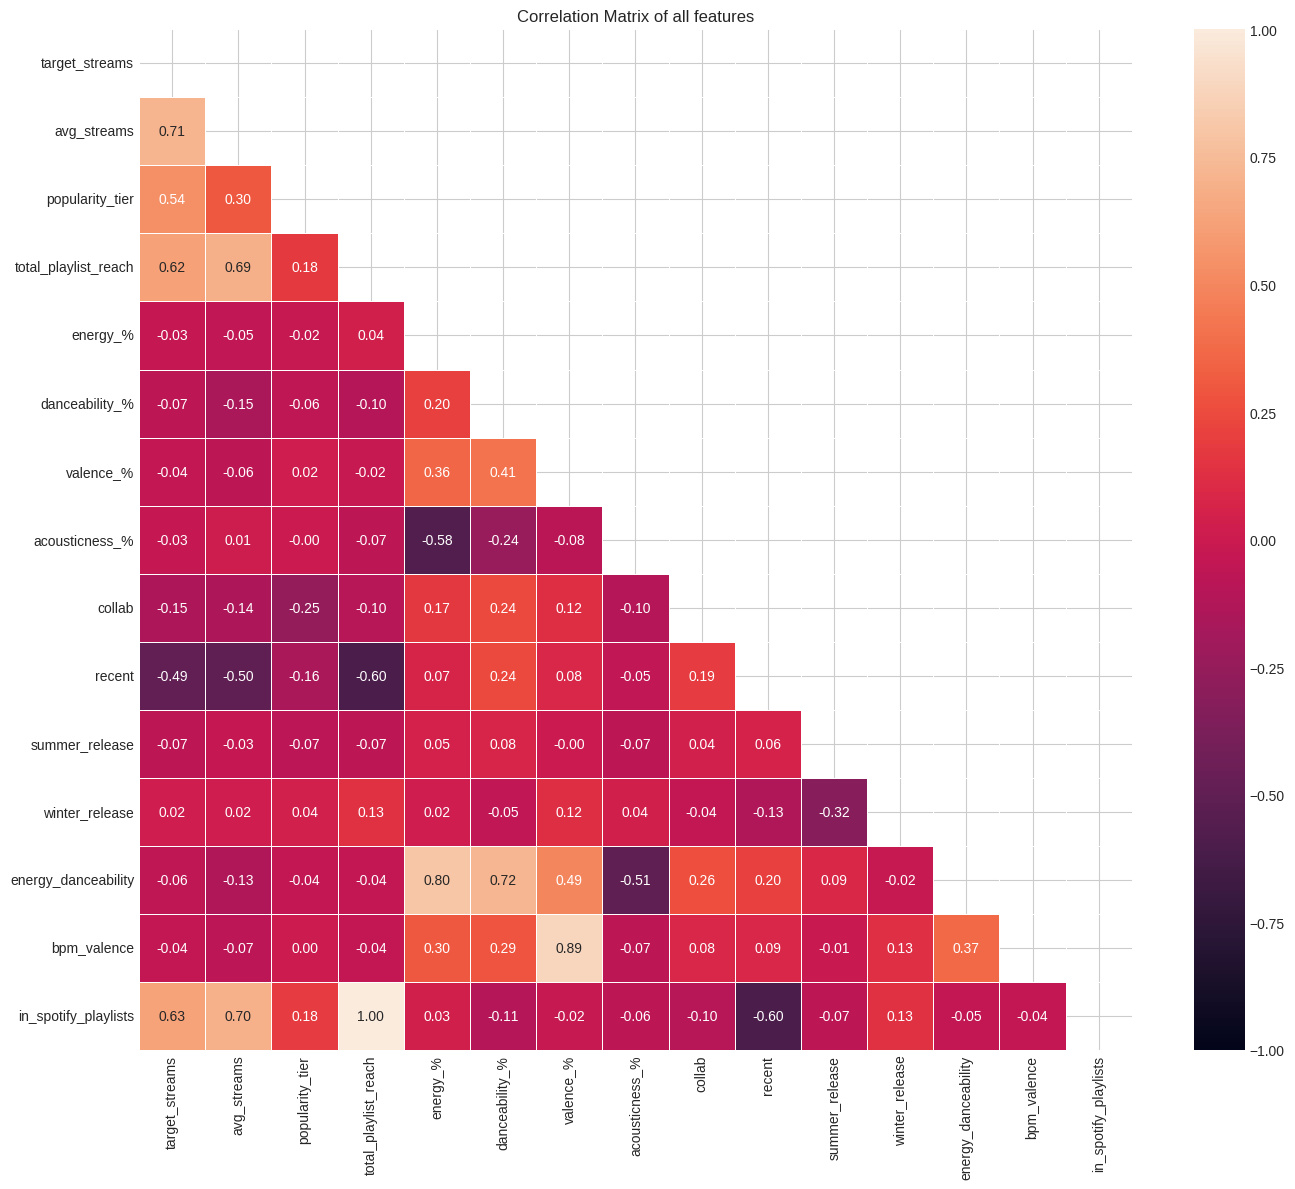

In [ ]:
# Calculating correlation between all features and target
correlation_matrix = modelling_data.corr()

plt.figure(figsize=(14, 12))
mask = np.triu(correlation_matrix)

# Drawing a heatmap, but not for all variables to avoid overcrowding the matrix
corr_features = ['target_streams', 'avg_streams', 'popularity_tier', 'total_playlist_reach', 'energy_%', 'danceability_%', 'valence_%', 'acousticness_%',
                 'collab', 'recent', 'summer_release', 'winter_release', 'energy_danceability', 'bpm_valence', 'in_spotify_playlists']
subset_correlation = correlation_matrix.loc[corr_features, corr_features]
subset_mask = np.triu(subset_correlation)
sns.heatmap(subset_correlation, mask = subset_mask, cmap='rocket', center=0, linewidths=0.5, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of all features')
plt.tight_layout()
plt.show()

In [ ]:
# Getting the list of 20 variables with the highest correlation values
list_corr = correlation_matrix['target_streams'].abs().sort_values(ascending=False)
print(list_corr.head(21))

target_streams              1.000000
streams_log                 1.000000
streams_normalized          0.814736
in_spotify_playlists_log    0.787124
avg_streams                 0.713452
in_deezer_playlists_log     0.703861
in_spotify_playlists        0.632161
total_playlist_reach        0.621108
in_apple_playlists          0.613879
in_apple_playlists_log      0.607685
days_since_release_log      0.564893
popularity_tier             0.536123
recent                      0.492262
in_deezer_playlists         0.434695
in_apple_charts             0.270380
decade                      0.270180
released_year               0.252009
days_since_release          0.251497
total_chart_presence        0.240721
in_spotify_charts_log       0.214924
in_deezer_charts_log        0.199063
Name: target_streams, dtype: float64


In [ ]:
# Checking for multicollinearity for set treshold of 0.8
corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

print("\nHighly correlated variables:")
for i, pair in enumerate(corr_pairs[:20], 1):
  print(f"{i}. {pair[0]} and {pair[1]}: {pair[2]:.4f}")


Highly correlated variables:
1. released_year and decade: 0.9852
2. released_year and days_since_release: -0.9996
3. released_year and days_since_release_log: -0.8065
4. released_month and release_quarter: 0.9734
5. in_spotify_playlists and in_deezer_playlists: 0.8264
6. in_spotify_playlists and total_playlist_reach: 0.9976
7. in_spotify_charts and in_spotify_charts_log: 0.8278
8. in_apple_charts and total_chart_presence: 0.9571
9. in_deezer_playlists and total_playlist_reach: 0.8635
10. in_deezer_charts and in_deezer_charts_log: 0.8752
11. danceability_% and danceability_%_percentile: 0.9808
12. valence_% and bpm_valence: 0.8869
13. valence_% and valence_%_percentile: 0.9972
14. energy_% and energy_%_percentile: 0.9805
15. acousticness_% and acousticness_%_percentile: 0.9409
16. decade and days_since_release: -0.9851
17. decade and days_since_release_log: -0.8163
18. streams_normalized and streams_log: 0.8147
19. streams_normalized and avg_streams: 0.8460
20. streams_normalized and t

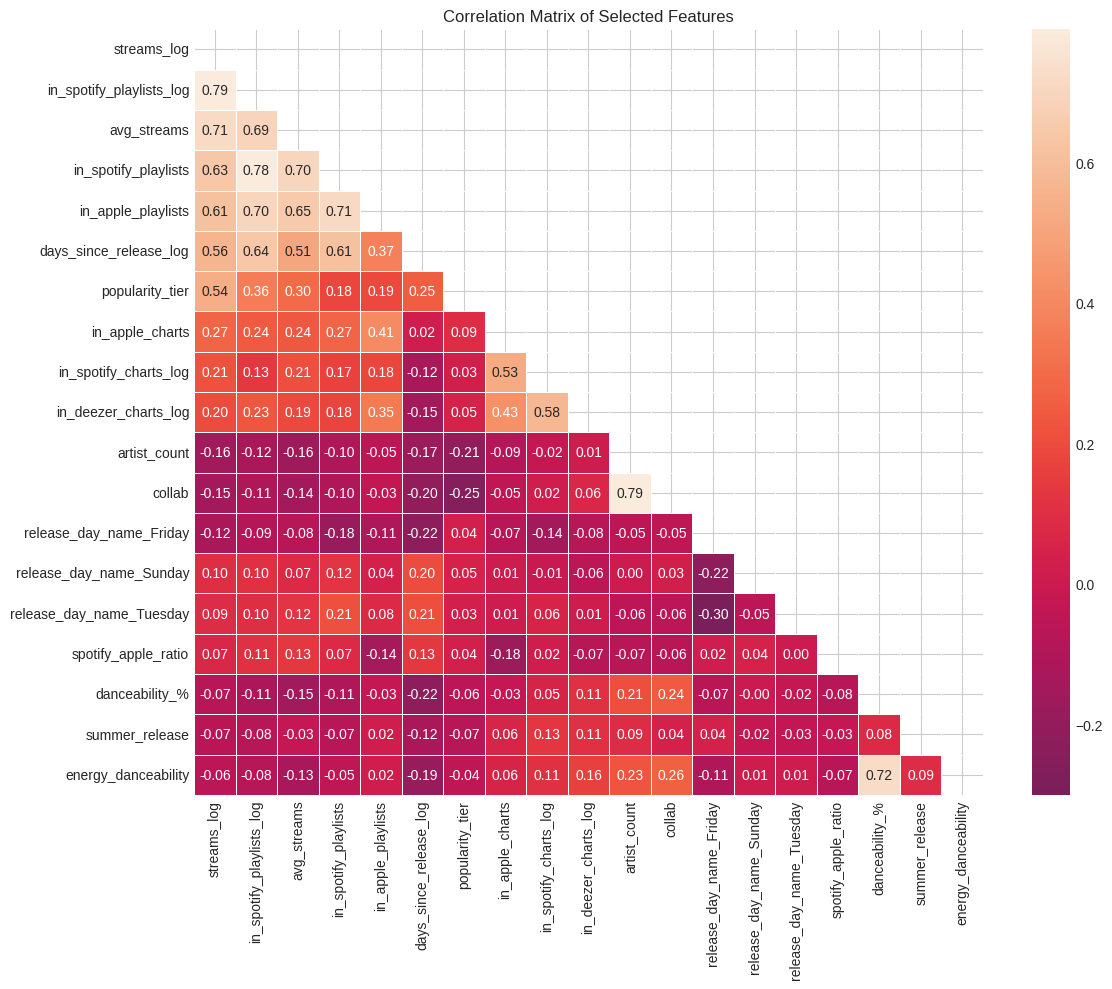

In [ ]:
# Selecting most important variables for modeling based on correlation

selected_variables = ['streams_log', 'in_spotify_playlists_log', 'avg_streams', 'in_spotify_playlists', 'in_apple_playlists',
                    'days_since_release_log', 'popularity_tier', 'in_apple_charts', 'in_spotify_charts_log', 'in_deezer_charts_log', 'artist_count',
                    'collab', 'release_day_name_Friday', 'release_day_name_Sunday', 'release_day_name_Tuesday', 'spotify_apple_ratio',
                    'danceability_%', 'summer_release', 'energy_danceability']

plt.figure(figsize=(12, 10))
selected_corr = correlation_matrix.loc[selected_variables, selected_variables]
selected_mask = np.triu(selected_corr)
sns.heatmap(selected_corr, mask=selected_mask, cmap='rocket', center=0,
            linewidths=0.5, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()

In [ ]:
# Preparing sets for modelling

X = modelling_data[selected_variables].values
y_reg= modelling_data[["target_streams"]].values
y_class = modelling_data['popularity_tier']

print("\nFinal dataset shape:", X.shape)
print("\nFinal dataset shape:", y_reg.shape)
print("\nFinal dataset shape:", y_class.shape)


Final dataset shape: (952, 19)

Final dataset shape: (952, 1)

Final dataset shape: (952,)


In [ ]:
# Splitting data into train and test sets

from sklearn import model_selection

splits = model_selection.train_test_split(X, y_reg, y_class, test_size=.3, random_state=0)
X_train, X_test, y_train_reg, y_test_reg, y_train_class, y_test_class = splits
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_train_class.shape, y_test_class.shape)

(666, 19) (286, 19) (666, 1) (286, 1) (666,) (286,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


Processed training data:
Mean: [ 2.85357323e-15 -4.00347089e-15 -2.34047016e-16 -8.66840800e-17
  9.20184849e-17]

Std: [1. 1. 1. 1. 1.]


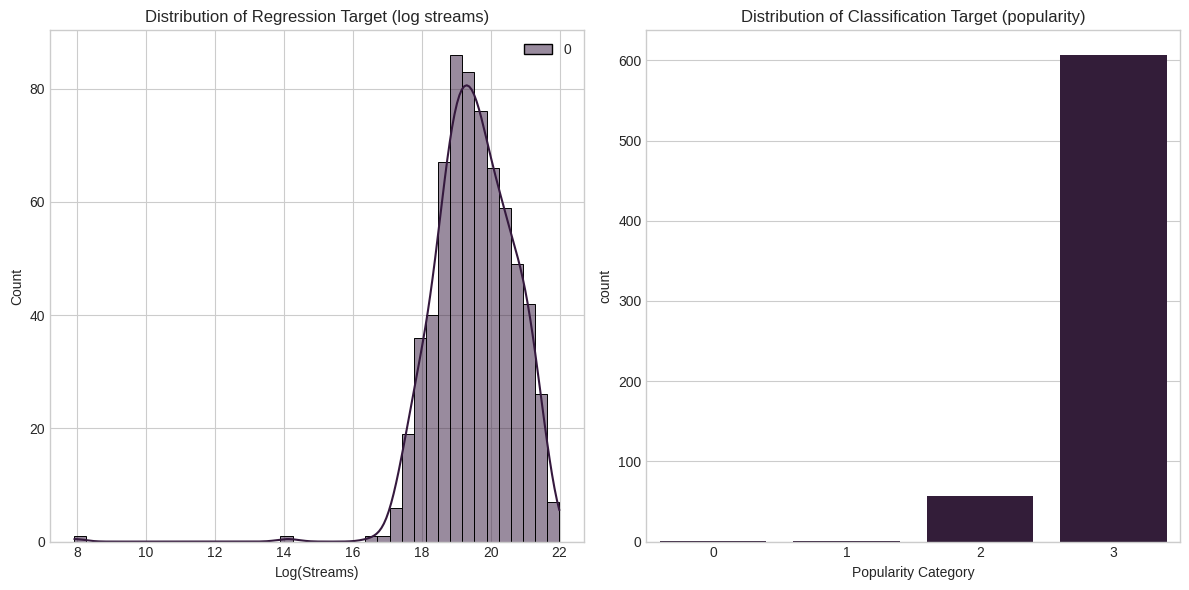

In [ ]:
# Creating preprocessing pipeline for numerical variables and applying it to training data
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_processed = preprocessor.fit_transform(X_train)

print("\nProcessed training data:")
processed_mean = np.mean(X_train_processed, axis=0)
processed_std = np.std(X_train_processed, axis=0)
print("Mean:", processed_mean[:5]) #0
print("\nStd:", processed_std[:5]) #1

# Target variable distributions
plt.figure(figsize=(12, 6))

# Regression
plt.subplot(1, 2, 1)
sns.histplot(y_train_reg, kde=True)
plt.title('Distribution of Regression Target (log streams)')
plt.xlabel('Log(Streams)')

# Classification
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_class)
plt.title('Distribution of Classification Target (popularity)')
plt.xlabel('Popularity Category')

plt.tight_layout()
plt.show()

Model comparison:
               Model  Train R²   Test R²     Test RMSE     CV R²    CV Std
0  Linear Regression  1.000000  1.000000  2.948562e-15  1.000000  0.000000
1  Gradient Boosting  0.999934  0.999024  3.464831e-02  0.943592  0.111713
2      Random Forest  0.987977  0.998621  4.119349e-02  0.942933  0.113646
3      Decision Tree  1.000000  0.996035  6.983473e-02  0.941596  0.113948

Best model: Linear Regression
Test R²: 1.0000
Test RMSE: 0.0000 



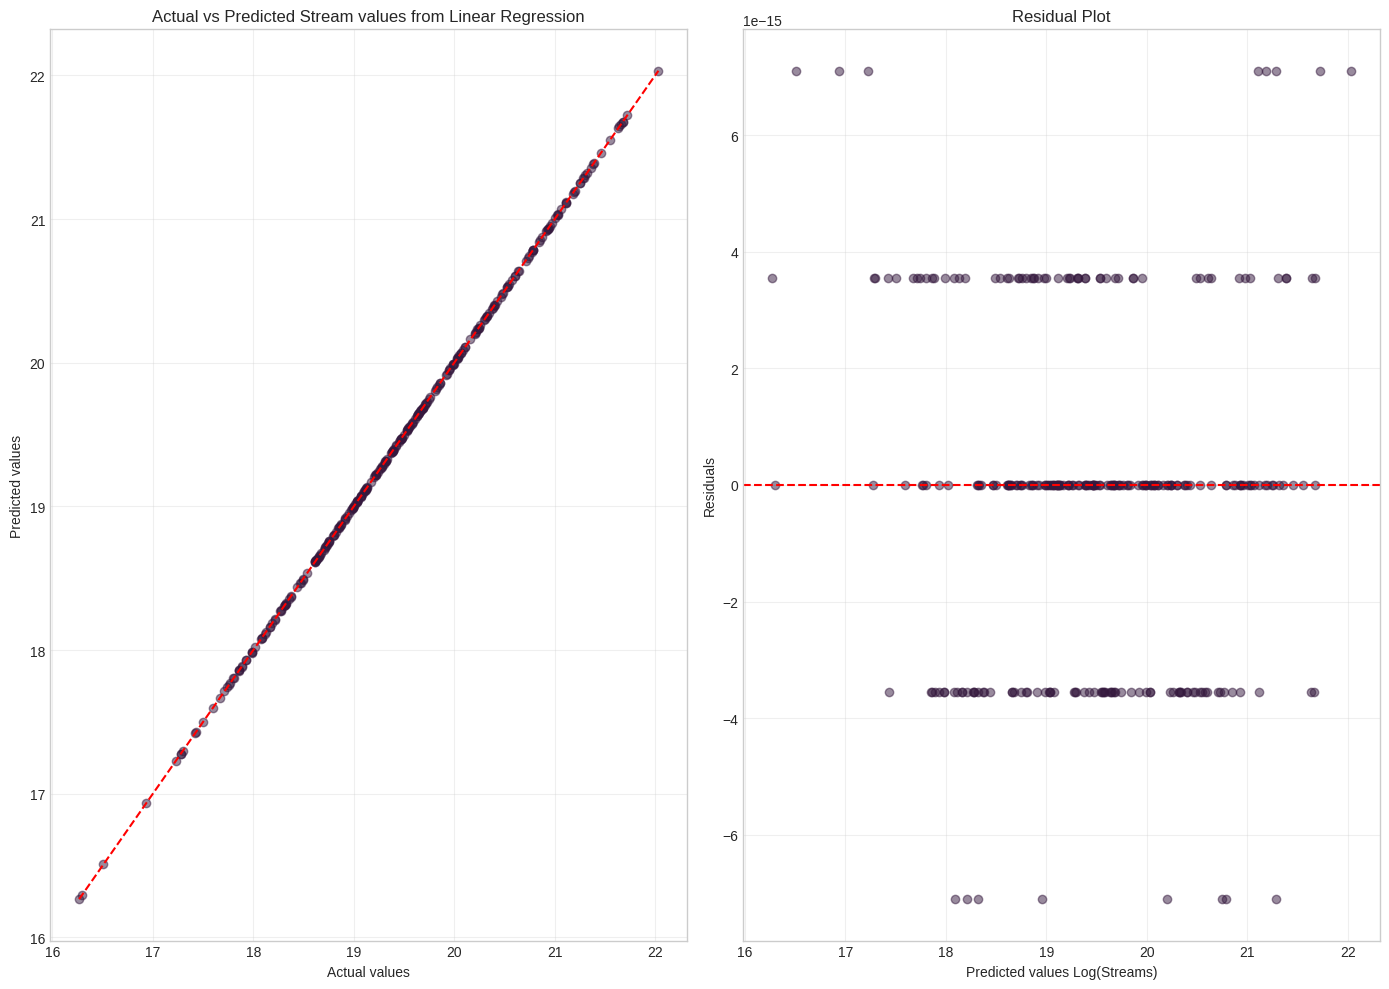

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Defining regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=0),
    'Random Forest': RandomForestRegressor(random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(random_state=0)
}

# Training and evaluating regression models
def evaluate_regression_model(name, model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    cv_mean = np.mean(cv_scores)
    cv_std = np.std(cv_scores)

    return {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'pipeline': pipeline
    }

# Training and evaluating all models
results = {}
for name, model in regression_models.items():
    results[name] = evaluate_regression_model(name, model, X_train, X_test, y_train_reg, y_test_reg)

# Creating a results table
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train R²': [results[model]['train_r2'] for model in results],
    'Test R²': [results[model]['test_r2'] for model in results],
    'Test RMSE': [results[model]['test_rmse'] for model in results],
    'CV R²': [results[model]['cv_mean'] for model in results],
    'CV Std': [results[model]['cv_std'] for model in results]
})

# Sorting by test R² and choosing the best model
results_df = results_df.sort_values('Test R²', ascending=False).reset_index(drop=True)
print("Model comparison:")
print(results_df)

best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['pipeline']
print(f"\nBest model: {best_model_name}")
print(f"Test R²: {results[best_model_name]['test_r2']:.4f}")
print(f"Test RMSE: {results[best_model_name]['test_rmse']:.4f} \n")

# Actual vs Predicted values and residual plots for the best model
plt.figure(figsize=(14, 10))
plt.subplot(1, 2, 1)
y_pred = best_model.predict(X_test)
plt.scatter(y_test_reg, y_pred, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title(f'Actual vs Predicted Stream values from {best_model_name}')
plt.grid(True, alpha=0.3)


plt.subplot(1, 2, 2)
residuals = y_test_reg - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values Log(Streams)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()